In [85]:
import pandas as pd
df = pd.read_csv('data/housing.data',header=None,sep="\s+")
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


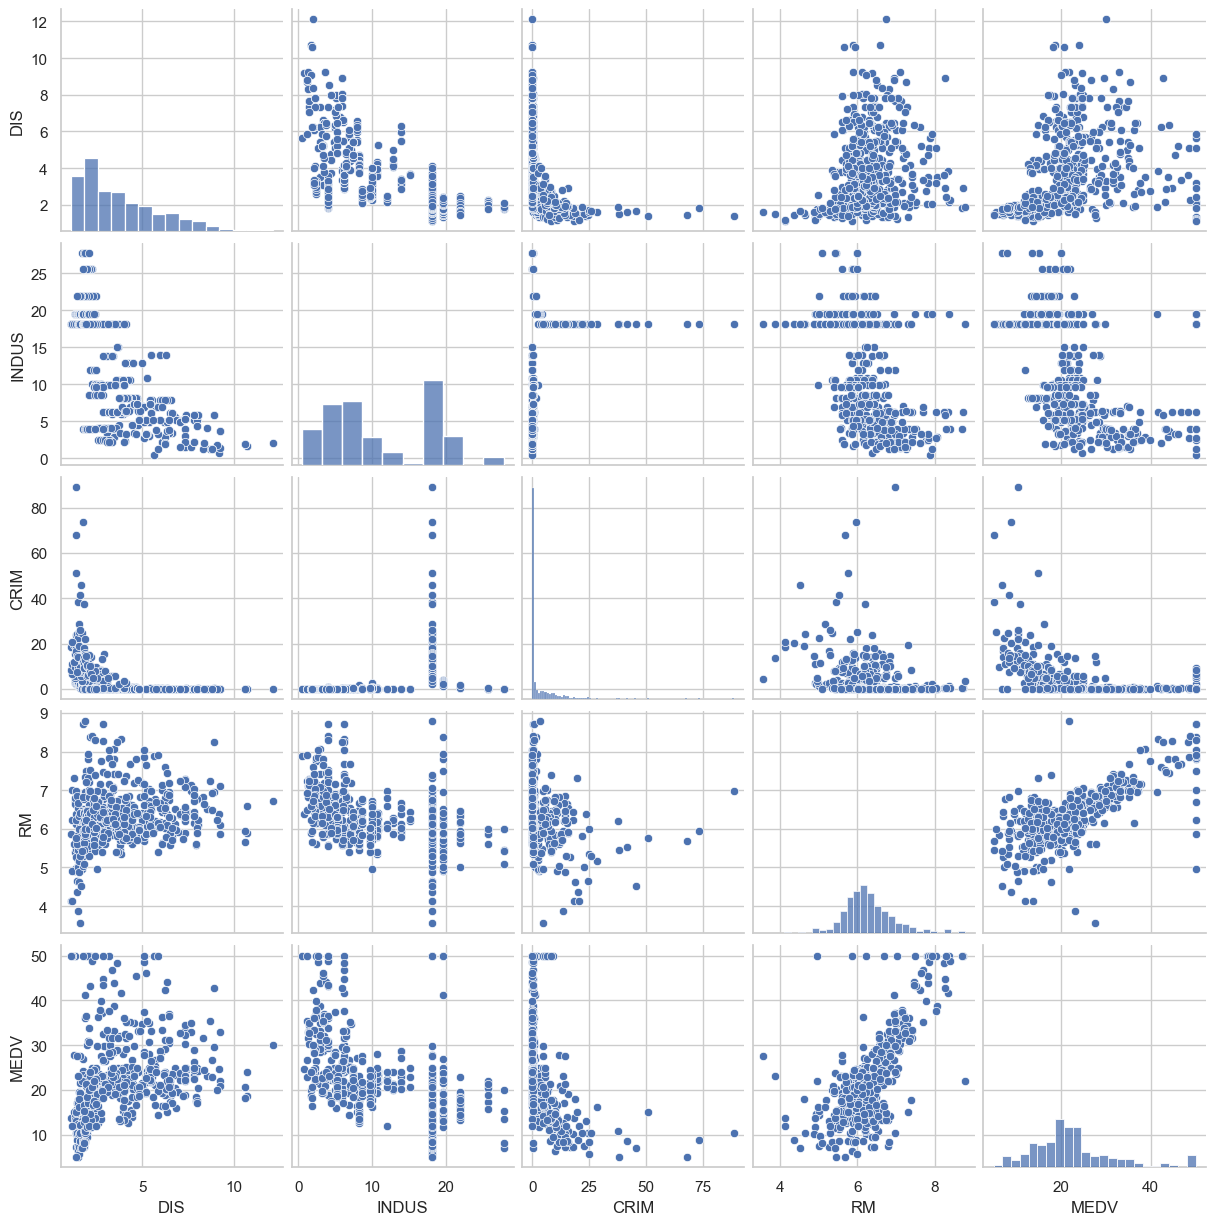

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', context='notebook')
cols =['DIS','INDUS','CRIM','RM','MEDV']

sns.pairplot(df[cols], height=2.5)
plt.show()

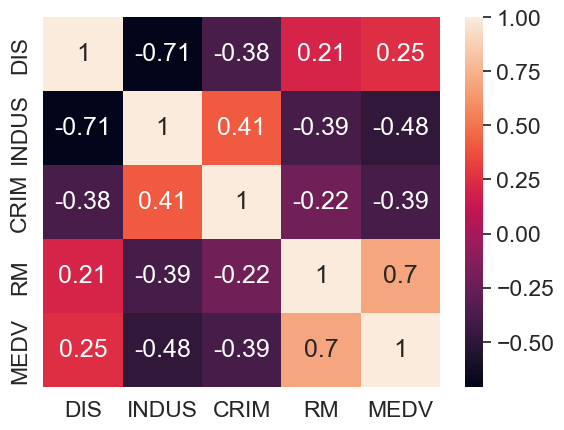

In [87]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.5)

sns.heatmap(cm,cbar=True, annot=True, yticklabels=cols, xticklabels=cols)
plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

In [89]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

print(X)
print(X_std)

slr = LinearRegression()
slr.fit(X_std, y_std)


[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

LinearRegression()

Text(0.5, 0, 'Promedio  de habitaciones [RM]')

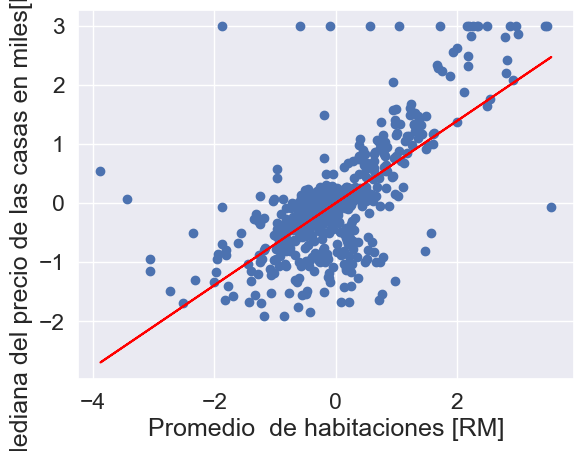

In [90]:
plt.scatter(X_std, y_std)
plt.plot(X_std,slr.predict(X_std), color = 'red')
plt.ylabel("Mediana del precio de las casas en miles[MEDV]")
plt.xlabel("Promedio  de habitaciones [RM]")

In [91]:
num_habit = 5
num_habit_std = sc_x.transform(np.array([num_habit]).reshape(-1,1))
print(f'El precio de una casa con {num_habit} habitaciones en boston es de ',sc_y.inverse_transform(slr.predict(num_habit_std)))


El precio de una casa con 5 habitaciones en boston es de  [[10.83992413]]


## Ahora utilizaremos 2 variables

In [92]:
X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

print(X)
print(X_std)

slr = LinearRegression()
slr.fit(X_std, y_std)


[[ 6.575  2.31 ]
 [ 6.421  7.07 ]
 [ 7.185  7.07 ]
 ...
 [ 6.976 11.93 ]
 [ 6.794 11.93 ]
 [ 6.03  11.93 ]]
[[ 0.41367189 -1.2879095 ]
 [ 0.19427445 -0.59338101]
 [ 1.28271368 -0.59338101]
 ...
 [ 0.98496002  0.11573841]
 [ 0.72567214  0.11573841]
 [-0.36276709  0.11573841]]


LinearRegression()

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np

In [94]:
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

X1,X2 = np.meshgrid(x1_range,x2_range)
plano = pd.DataFrame({'RM':X1.ravel(),'INDUS':X2.ravel()})
plano

,RM,INDUS
0,3.561,0.46
1,4.561,0.46
2,5.561,0.46
3,6.561,0.46
4,7.561,0.46
...,...,...
163,4.561,27.46
164,5.561,27.46
165,6.561,27.46
166,7.561,27.46


In [95]:
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)


d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


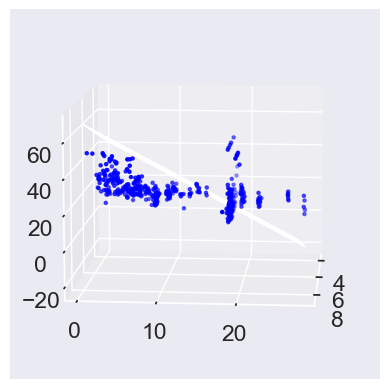

In [96]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='blue', marker='.')
ax.view_init(elev=10,azim=5)

# REGRESION LINEAL EN UN CASO "REAL"

In [97]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context = 'notebook')

In [98]:
df = pd.read_csv('data/insurance.csv')

In [99]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [100]:
df.shape

(1338, 7)

<Axes: >

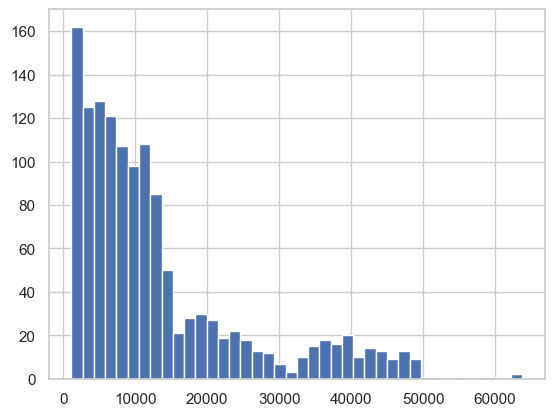

In [101]:
df.charges.hist(bins =40)

In [102]:
mayores = df[df.charges>50000]
menores = df[df.charges<=50000]
df = df[df.charges<50000]
df.shape

(1331, 7)

<Axes: >

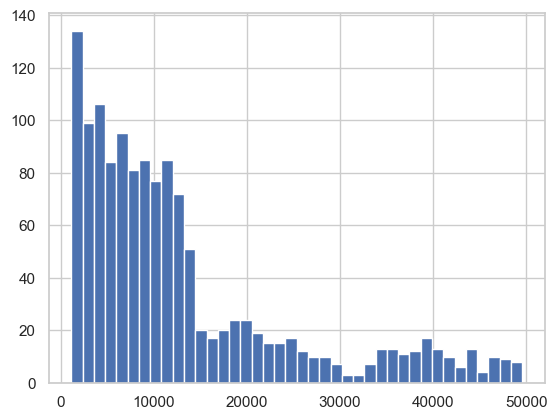

In [103]:
df.charges.hist(bins =40)

<Axes: >

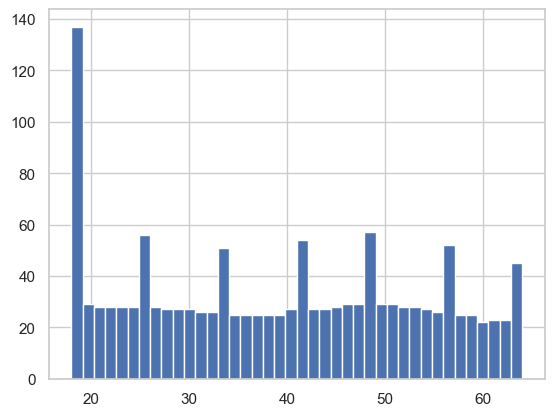

In [104]:
df.age.hist(bins =40)

<Axes: >

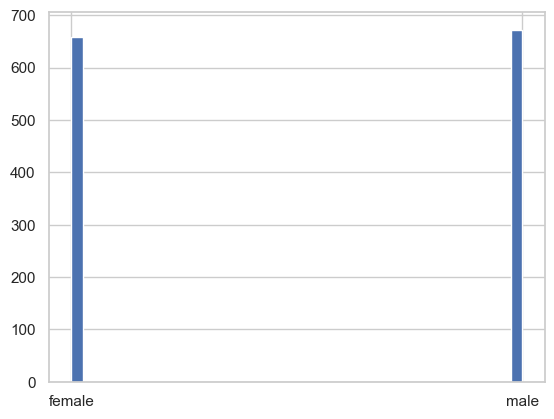

In [105]:
df.sex.hist(bins =40)

<Axes: >

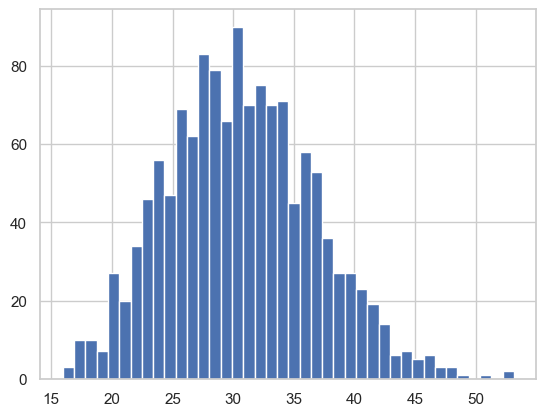

In [106]:
df.bmi.hist(bins =40)

<Axes: >

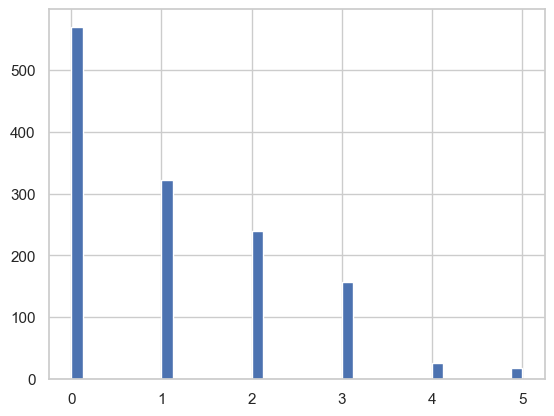

In [107]:
df.children.hist(bins =40)

<Axes: >

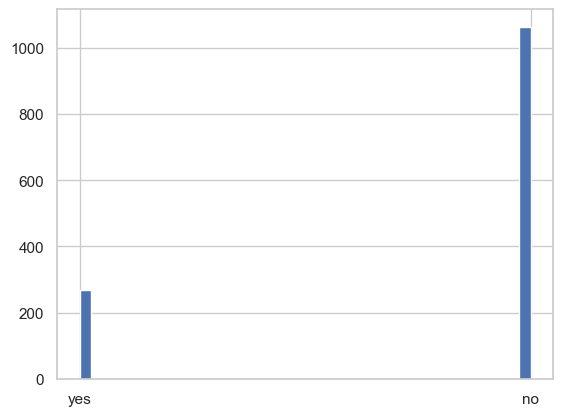

In [108]:
df.smoker.hist(bins =40)

<Axes: >

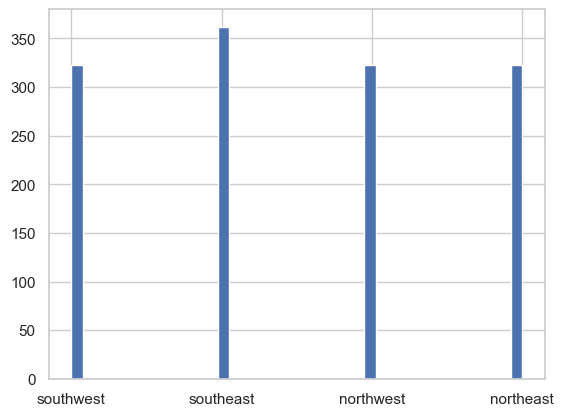

In [109]:
df.region.hist(bins =40)

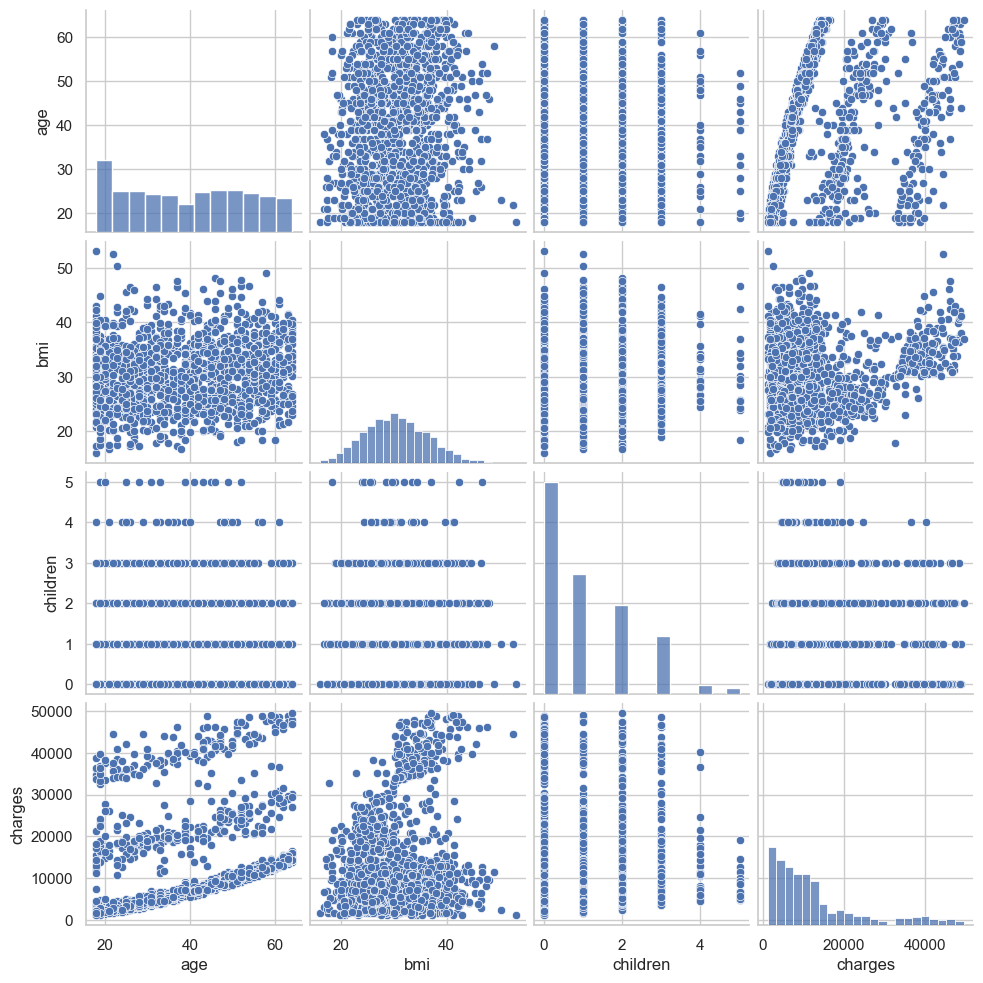

In [110]:
sns.pairplot(df,height=2.5)
plt.show()

<Axes: >

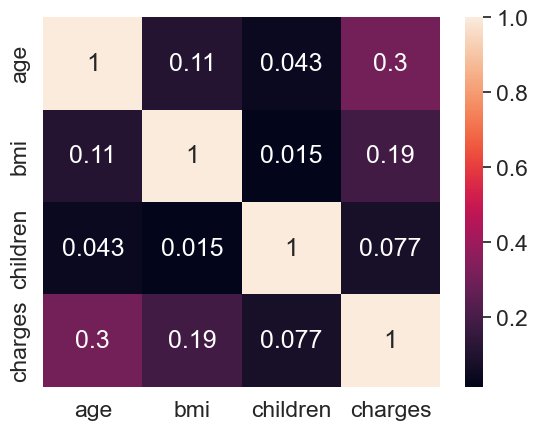

In [111]:
numeric_cols = ['age','bmi','children','charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)

In [112]:
pd.get_dummies(df, columns=['sex', 'smoker','region'], drop_first=True,dtype='int64')

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [114]:
df =pd.get_dummies(df, columns=['sex', 'smoker','region'], drop_first=True, dtype='int64')
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [172]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X= df[X_cols].values
y= df[y_col].values

X_train, X_test, y_train,y_test = train_test_split(X, y,train_size=0.75)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [173]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred.shape

(333, 1)

In [181]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", round(r2,4))
print("mse  ", round(mse,4))

r2  0.8144
mse   0.2123


In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def summary(model, X_test, y_test, X_cols):
    # Asegurar que intercept_ y coef_ estén en la forma correcta
    model.intercept_ = np.ravel(model.intercept_)[0]
    model.coef_ = np.ravel(model.coef_)

    # Asegurar que y_test sea un vector plano
    y_test = np.ravel(y_test)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas principales
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calcular R2 ajustado
    n = X_test.shape[0]  # Número de muestras
    p = X_test.shape[1]  # Número de predictores
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Mostrar resultados
    print("============= SUMMARY =============")
    print(f"R2 Score: {r2:.4f}")
    print(f"Adjusted R2 Score: {r2_adj:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("------------------------------------")
    print(f"Intercept: {model.intercept_:.4f}")
    print("Coefficients:")
    for name, coef in zip(X_cols, model.coef_):
        print(f"  {name}: {coef:.4f}")


In [183]:
summary(model, X_test, y_test, X_cols)

============= SUMMARY =============
R2 Score: 0.8144
Adjusted R2 Score: 0.8098
Mean Absolute Error (MAE): 0.3413
Mean Squared Error (MSE): 0.2123
Root Mean Squared Error (RMSE): 0.4608
------------------------------------
Intercept: -0.0017
Coefficients:
  children: 0.0577
  smoker_yes: 0.7672
  region_southeast: -0.0306
  age: 0.2882
  sex_male: -0.0092
  region_northwest: -0.0112
  bmi: 0.1758
  region_southwest: -0.0380


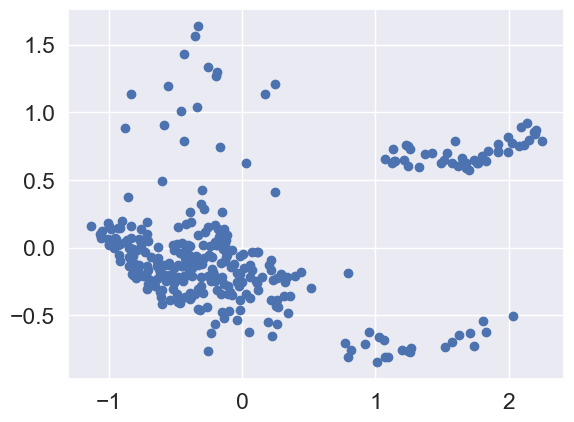

In [184]:
residuals = np.subtract(y_test,y_pred)
plt.scatter(y_pred, residuals)
plt.show()

### ELIMINANDO ALGUNAS VARIABLES (MEJORANDO EL MODELO)

In [191]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >=30).astype(int)
df_second['sobrepeso*fumador']= df_second.sobrepeso * df_second.smoker_yes

In [193]:
X_cols = list(set(df_second.columns)-set(['charges']))
y_col = ['charges']

X= df_second[X_cols].values
y= df_second[y_col].values

X_train, X_test, y_train,y_test = train_test_split(X, y,train_size=0.75)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [194]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred.shape

(333, 1)

In [195]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", round(r2,4))
print("mse  ", round(mse,4))

r2  0.8706
mse   0.135


In [196]:
summary(model, X_test, y_test, X_cols)

============= SUMMARY =============
R2 Score: 0.8706
Adjusted R2 Score: 0.8661
Mean Absolute Error (MAE): 0.2001
Mean Squared Error (MSE): 0.1350
Root Mean Squared Error (RMSE): 0.3674
------------------------------------
Intercept: 0.0036
Coefficients:
  children: 0.0826
  smoker_yes: 0.4535
  region_southeast: -0.0309
  age: -0.1223
  sex_male: -0.0213
  region_northwest: -0.0068
  age2: 0.4350
  bmi: 0.0642
  sobrepeso*fumador: 0.4880
  region_southwest: -0.0538
  sobrepeso: -0.0331


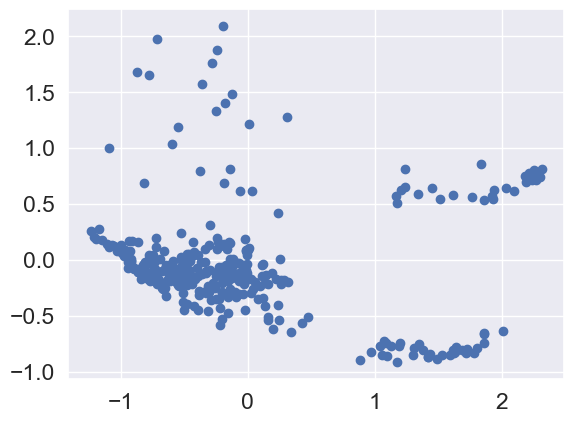

In [189]:
residuals = np.subtract(y_test,y_pred)
plt.scatter(y_pred, residuals)
plt.show()

In [197]:
df_third = df.copy()
df_third['age2'] = df_third.age**2
df_third['sobrepeso'] = (df_third.bmi >=30).astype(int)
df_third['sobrepeso*fumador']= df_third.sobrepeso * df_third.smoker_yes

In [209]:
# X_cols = list(set(df_third.columns)-set(['charges']))
X_cols = ['sobrepeso*fumador','smoker_yes','age2','children']
y_col = ['charges']

X= df_third[X_cols].values
y= df_third[y_col].values

X_train, X_test, y_train,y_test = train_test_split(X, y,train_size=0.75)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [214]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred.shape

(333, 1)

In [215]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", round(r2,4))
print("mse  ", round(mse,4))

r2  0.8946
mse   0.108


In [216]:
summary(model, X_test, y_test, X_cols)

============= SUMMARY =============
R2 Score: 0.8946
Adjusted R2 Score: 0.8933
Mean Absolute Error (MAE): 0.1914
Mean Squared Error (MSE): 0.1080
Root Mean Squared Error (RMSE): 0.3286
------------------------------------
Intercept: 0.0113
Coefficients:
  sobrepeso*fumador: 0.4850
  smoker_yes: 0.4673
  age2: 0.3218
  children: 0.0792


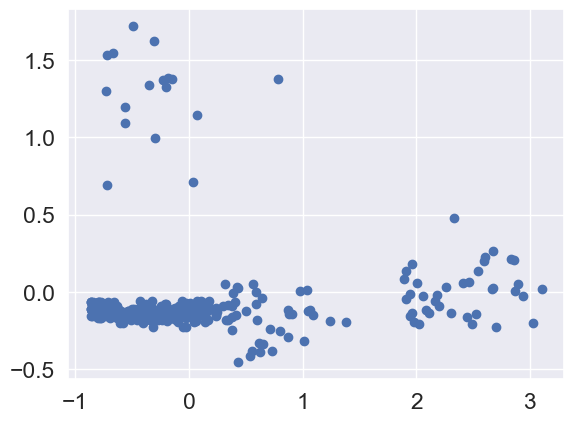

In [217]:
residuals = np.subtract(y_test,y_pred)
plt.scatter(y_pred, residuals)
plt.show()